# Building Custom Racing Tracks w/Racing Lines
By: Matt Post '22 ||
Lafayette College, Dept. Mechanical Engineering ||
AY: 2021-2022

This notebook is an updated version of BuildingCustomRaceTracks notebook. While the previous notebook created a series of a functions that allowed for the construction of an initial custom race track. This notebook will repoduce current work achompilished as well as implement additional functions to allow for consideration of track parameters such as track width and clothoidal shape of our racing line. This notebook will also be crucial for creating a more realistic driver model for the point mass simulator.

## Where to start?
Working this problem of constructing a more realistic track will require a more structural and intentional approach than how the orginal notebook/script was written. Our process for this construction will be as follow:

**MIDDLE TRACK**
1. Initialize Function -- Estabilish Empty Vectors & Starting Tracks/Curvitures
2. Add Straight Function -- Adds straights segements to initialized vectors
    - Inputs: Current Station & Curviture Arrays, value of length added
    - Outputs: Updated Station & Curviture Arrays 
3. Add Turn Function:
    - Inputs: Current Station & Curviture Arrays, value of radius of turn, angle of turn, and width of track
    - Outputs: Updated Station & Curviture Arrays for Inner & Outer Curvitures of track 
**OUTER & INNER TRACKS**
1. Adding Inner & Outer Turns
2. Setting Initial Points
3. Updating Straights
4. Automating Track Construction

**RACING LINE**

## Building The Middle Track

This section of the notebook works to build the middle track of our custom track. This initial phase will facilitate the later development of our realistic track with inner & outter tracks and eventually developing our racing line.
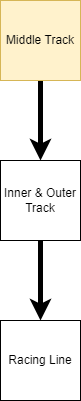

### Function: Initializing Track
Our first function will initialize all of our structs and vectors so we can add relevant segments (turns & straights).

In [1]:
clear all
function track = initializeTrack()
    % initialize vectors
    track.inner.S = []; 
    track.inner.K = [];
    track.middle.S = []; 
    track.middle.K = [];
    track.outer.S = []; 
    track.outer.K = [];
    track.RacingLine.S = []; 
    track.RacingLine.K = [];
    
    % prepopulate with values of 0 for initial station point
    track.inner.S(1) = 0; 
    track.inner.K(1) = 0;
    track.middle.S(1) = 0; 
    track.middle.K(1) = 0;
    track.outer.S(1) = 0; 
    track.outer.K(1) = 0;
    track.RacingLine.S(1) = 0; 
    track.RacingLine.K(1) = 0;
end

Unit test for initializeTrack() function. Want to make sure that each of our sub structs are initialized.

In [2]:
test = initializeTrack()

test =

  scalar structure containing the fields:

    inner =

      scalar structure containing the fields:

        S = 0
        K = 0

    middle =

      scalar structure containing the fields:

        S = 0
        K = 0

    outer =

      scalar structure containing the fields:

        S = 0
        K = 0

    RacingLine =

      scalar structure containing the fields:

        S = 0
        K = 0




### Function(s): Adding A Straight Segement
This next set of functions will work to add a straight segment to our track struct. This will be achomplished by using two seperate functions. One function actually add the straight & one function will automate adding the straight to each of the track's sub structs.

In [3]:
function [S,K] = addStraight(S_current,K_current,lengthStraight,KStraight)
    N = length(S_current);
    fudge = 0.001;
    S_current(N+1) = S_current(N)+fudge;
    K_current(N+1) = KStraight;
    S_current(N+2) = S_current(N+1)+lengthStraight+fudge;
    K_current(N+2) = KStraight;
    S = S_current;
    K = K_current;
end

Unit test for one length to make sure we are adding to our straight values. This will be a manual test of calling specific structs before further functionalizing this shortly:

In [4]:
test = initializeTrack();
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,4,0);
test.middle.S,test.middle.K

ans =

   0.00000   0.00100   4.00200

ans =

   0   0   0



### Function(s): Adding A Turn Segment
This next set of functions will work to add a turn to our track along the outer and inner curvitures of the track. This function will be where we account for the width of the track. The first turn function we will build is the adding the outer curviture of the track.

In [5]:
function [S,K] = addTurn(S_cur,K_cur,RTurn,thetaTurn)
    N = length(S_cur);
    fudge = 0.001;
    KTurn = 1/RTurn;
    STurn = abs(thetaTurn*RTurn); % arc length
    S_cur(N+1) = S_cur(N)+fudge;
    S_cur(N+2) = S_cur(N+1)+STurn+fudge;
    
    if thetaTurn <=0
        K_cur(N+1) = -KTurn;
        K_cur(N+2) = -KTurn;
    else
        K_cur(N+1) = KTurn;
        K_cur(N+2) = KTurn;  
    end
    S = S_cur;
    K = K_cur;
end

Another unit test:

In [6]:
test = initializeTrack();
RTurn = 1;
theta_turn = pi;
[test.middle.S,test.middle.K] = addTurn(test.outer.S, test.outer.K,RTurn,theta_turn);
test.middle.S,test.middle.K

ans =

   0.00000   0.00100   3.14359

ans =

   0   1   1



### Function: Building A High Resolution Map
Now we using code provided by Professor Alexander Brown we will create a high resolution map of our track using the interp1 function within Octave.

In [7]:
function [track] = fillTrack(S,K,int_positions)
    nu(1) = int_positions.nu;
    X(1) = int_positions.X;
    Y(1) = int_positions.Y;
    %build a high resolution map
    Sq = min(S):.01:max(S);
    Kq = interp1(S,K,Sq);

    for k = 2:length(Sq)
       nu(k) = nu(k-1) + Kq(k-1)*(Sq(k)-Sq(k-1));
       X(k) = X(k-1) + (Sq(k)-Sq(k-1))*cos(nu(k-1));
       Y(k) = Y(k-1) + (Sq(k)-Sq(k-1))*sin(nu(k-1));
    end

    track.heading = nu;
    track.X = X;
    track.Y = Y;
    track.S = Sq;
    track.K = Kq;
end

Unit test to ensure that we can build the high resolution map. Specifically we will look to make sure we have the correct station and curviture. Additionally we will plot the X & Y of our track to ensure we have the correct mapping of the track we actually want.

ans =  0.031853
ans =  40.001
ans =  3.1415


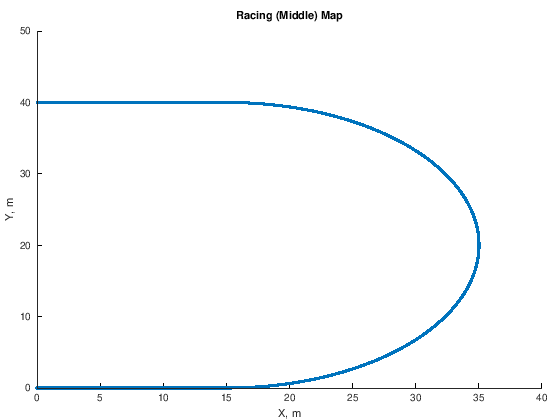

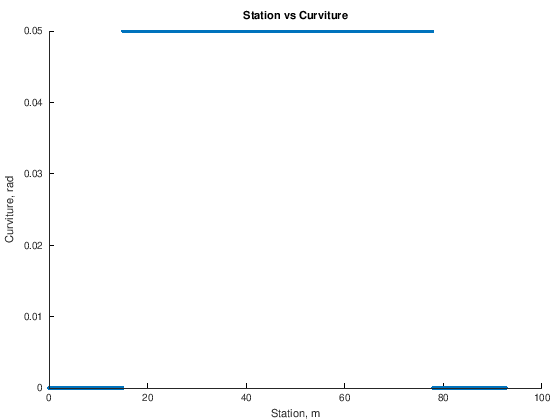

In [8]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
w_test = 5;
Kstraight = 0;
straight = 15;
int_position.X = 0;
int_position.Y = 0;
int_position.nu = 0;
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position);
figure()
hold on
title("Station vs Curviture")
xlabel("Station, m")
ylabel("Curviture, rad")
plot(test.middle.S,test.middle.K,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

figure()
hold on
title("Racing (Middle) Map")
xlabel("X, m")
ylabel("Y, m")
plot(test.middle.X,test.middle.Y,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off
test.middle.X(end)
test.middle.Y(end)
test.middle.heading(end)

### Function: Building A High Resolution Map (Moving Backwards)
This function will build a high resolution map of our track from an initial point incrementing moving backwards. This function will be crucial for constructing our racing line.

In [9]:
function [track] = fillBackwardsTrack(S,K,int_positions)
    nu(1) = int_positions.nu;
    X(1) = int_positions.X;
    Y(1) = int_positions.Y;
    %build a high resolution map
    Sq = max(S):-.01:min(S);
    Kq = interp1(S,K,Sq);

    for k = 2:length(Sq)
       nu(k) = nu(k-1) + Kq(k-1)*(Sq(k)-Sq(k-1));
       X(k) = X(k-1) + (Sq(k)-Sq(k-1))*cos(nu(k-1));
       Y(k) = Y(k-1) + (Sq(k)-Sq(k-1))*sin(nu(k-1));
    end

    track.heading = nu;
    track.X = X;
    track.Y = Y;
    track.S = Sq;
    track.K = Kq;
end

Now we will perform a unit test to recreate the same track from above.

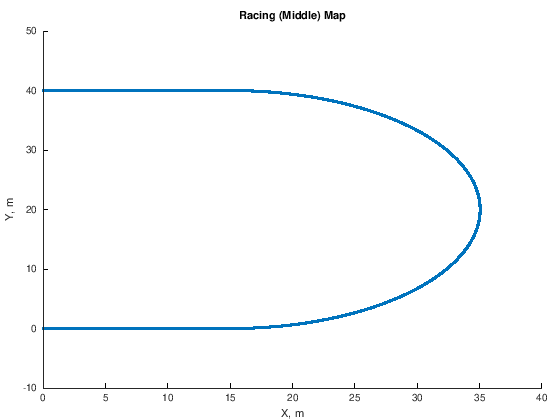

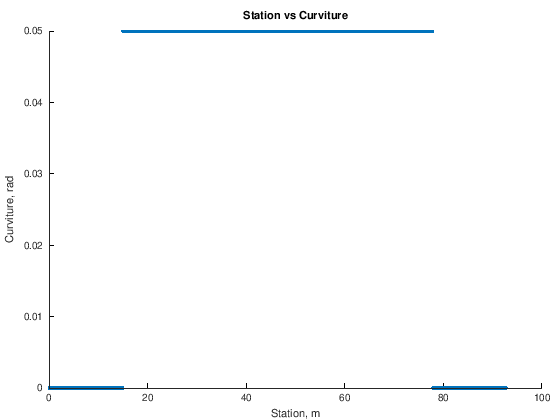

In [10]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
w_test = 5;
Kstraight = 0;
straight = 15;
int_position.X = 0.031853;
int_position.Y = 40.001;
int_position.nu = 3.1415;
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
test.middle = fillBackwardsTrack(test.middle.S,test.middle.K,int_position);
figure()
hold on
title("Station vs Curviture")
xlabel("Station, m")
ylabel("Curviture, rad")
plot(test.middle.S,test.middle.K,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

figure()
hold on
title("Racing (Middle) Map")
xlabel("X, m")
ylabel("Y, m")
plot(test.middle.X,test.middle.Y,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

## Building The Outer & Inner Track
Now that we have our middle line initialized we will move towards developing our inner & outer tracks based on a specified track width.
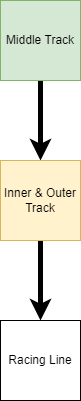

### Function: Adding Inner & Outer Turns
Our next function will make use of our current add turn function to account for the width of the track and construct an inner & outer "track" to make our track more physically real. 
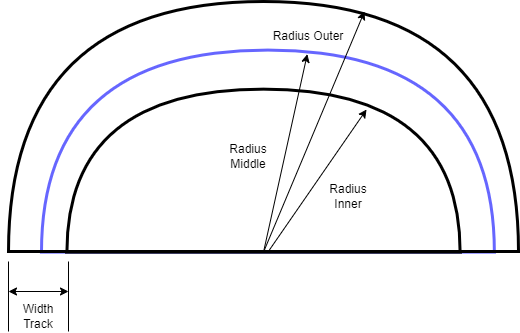
Using the image above as a reference, our outer radius is a function of track width and the radius of the middle track.
$$ R_{outer} = R_{middle} + \frac{width_{track}}{2} $$
Repeating the same process we can determine the radius of our inner track.
$$ R_{inner} = R_{middle} - \frac{width_{track}}{2} $$
Functionalized we can represent our inner and outer turns. 

In [11]:
function track = InnerAndOuterTurns(track,width_track,RTurn,theta_turn)
    RadOuter = RTurn+width_track/2;
    RadInner = RTurn-width_track/2;
    [track.outer.S,track.outer.K] = addTurn(track.outer.S,track.outer.K,RadOuter,theta_turn);
    [track.inner.S,track.inner.K] = addTurn(track.inner.S,track.inner.K,RadInner,theta_turn);
end

Now we will preform a unit test and to ensure that our function works.

In [12]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
w_test = 5;
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn);
test.outer.K
test.inner.K

ans =

   0.000000   0.044444   0.044444

ans =

   0.000000   0.057143   0.057143



The function works! This can be seen as how our curviture values for our inner radius are larger than the outer track. Additionally, we can see that our station is smaller than our outer station which makes sense because the station is incrimented by a smaller radius. As a quick test we are going to plot fill our track and initialize our outer and inner values with half of the track width in order to make position works.

ans =

  scalar structure containing the fields:

    X = 0
    Y =  2.5000
    nu = 0



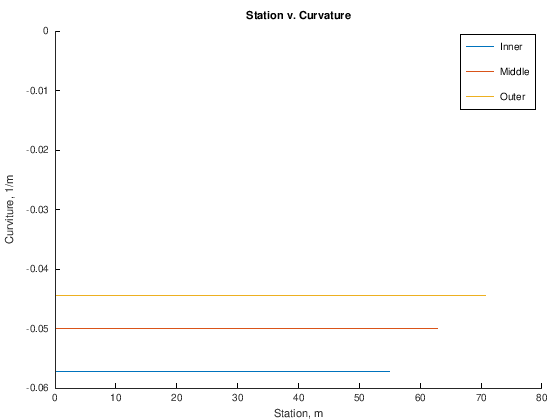

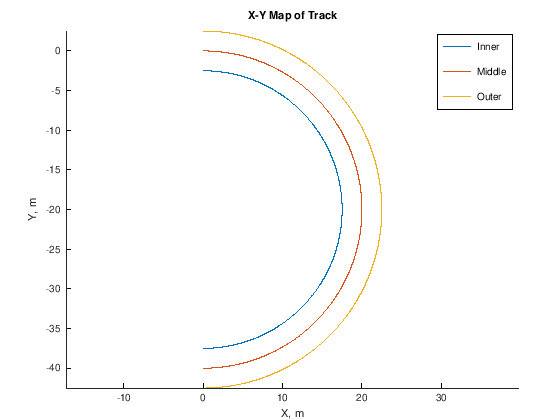

In [13]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;
width_track = 5;
int_position.inner.X = 0;
int_position.inner.Y = -width_track/2;
int_position.inner.nu = 0;
int_position.outer.X = 0;
int_position.outer.Y = width_track/2;
int_position.outer.nu = 0;
int_position.outer
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
int_position.middle.X = 0;
int_position.middle.Y = 0;
int_position.middle.nu = 0;
test.middle = fillTrack(test.middle.S,test.middle.K,int_position.middle);
figure()
hold on
title("X-Y Map of Track")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


figure()
hold on
title("Station v. Curvature")
xlabel("Station, m")
ylabel("Curviture, 1/m")
plot(test.inner.S,test.inner.K)
plot(test.middle.S,test.middle.K)
plot(test.outer.S,test.outer.K)
%axis equal
hold off
legend("Inner", "Middle","Outer")

This works, which is great! but while playing with this test, I identified an issue where we need to change the signage on each of the initial poistions whenever the sign of the angle changes. As such, we will construct a mini-function in order to prevent this issue in the future.

### Function: Getting Correct Initial Positions
This function will assign the correct initial position for our inner & outer tracks based on the angle of the first turn within a track. This will make sure that we have the correct X & Y values.

In [14]:
function int_positions = assignIntPosition(int_positions,width,ThetaTurn)
    %trackIntInfo = [];
    i = 1;
    while ThetaTurn(i) == 0
        i = i+1
    end
    
    if ThetaTurn(i) >=0;
        int_positions.inner.Y = width/2;
        int_positions.outer.Y = -width/2;
    else
        int_positions.outer.Y = width/2;
        int_positions.inner.Y = -width/2;
    end
end

Another unit test in the context of our previous unit test.

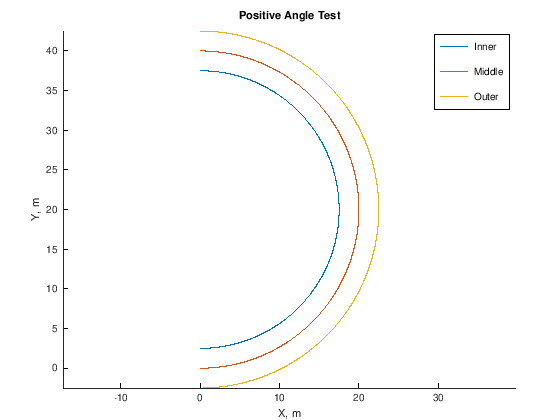

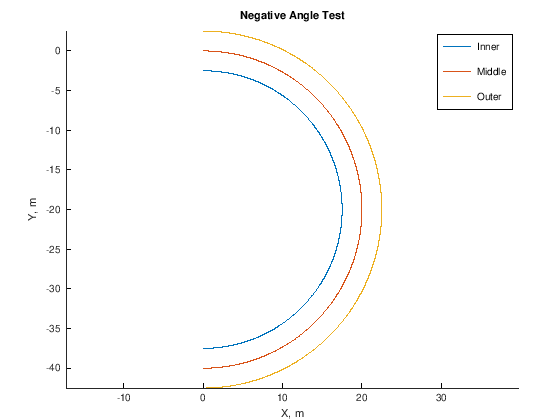

In [15]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;

w_test = 5;
int_positon = assignIntPosition(int_position,w_test,theta_turn);

test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position.middle);
figure()
hold on
title("Negative Angle Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


test = initializeTrack();
RTurn = 20;
theta_turn = pi;

w_test = 5;
int_position2 = assignIntPosition(int_position,w_test,theta_turn);

test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position2.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position2.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position2.middle);
figure()
hold on
title("Positive Angle Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")

Both of our tests work! Now we will check to make sure our add straight function works for new inner and outer tracks with our add straight function.

### Function: Adding Straights To Each Sub Struct
This next function will automate adding a straight to each of our sub structs at once by calling the add straight function three times in one function

In [16]:
function track = AddTrackStraights(track,straight,Kstraight)
    [track.inner.S,track.inner.K] = addStraight(track.inner.S,track.inner.K,straight,Kstraight);
    [track.outer.S,track.outer.K] = addStraight(track.outer.S,track.outer.K,straight,Kstraight);
    [track.middle.S,track.middle.K] = addStraight(track.middle.S,track.middle.K,straight,Kstraight);
end

Unit test once again.

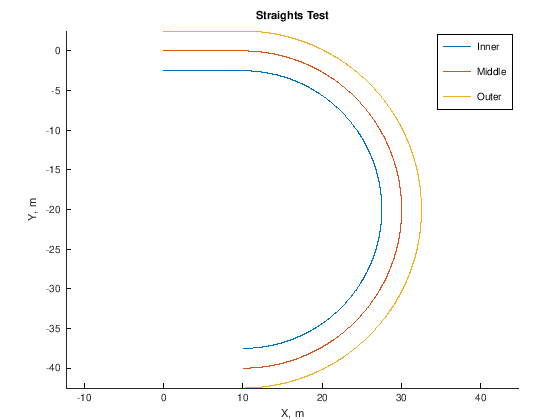

In [17]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;
straight = 10;
Kstraight = 0;
w_test = 5;
int_positions = assignIntPosition(int_position,w_test,theta_turn);
test = AddTrackStraights(test,straight,Kstraight);
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_positions.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_positions.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_positions.middle);
figure()
hold on
title("Straights Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


Our function works! Now we will work to automate our Inner and Outer track functions as one function that we can run once in a for loop.

### Function: Automating Track Construction
Making use of a for loop, we will construct our track with the call of one function. This will function will only be provided by three arrays: one of lengths, one of turns, and one of angles of turns.

In [18]:
function track = BuildTrack(lengths,theta,width_track,int_position)
    track = initializeTrack();
    int_position = assignIntPosition(int_position,width_track,theta);
    for i = 1:length(lengths)
        if abs(theta(i)) > 0
            track = InnerAndOuterTurns(track,width_track,lengths(i),theta(i));
            [track.middle.S,track.middle.K] = addTurn(track.middle.S,track.middle.K,lengths(i),theta(i));
        else
            track = AddTrackStraights(track,lengths(i),theta(i));
        end

        track.inner = fillTrack(track.inner.S,track.inner.K,int_position.inner);
        track.outer = fillTrack(track.outer.S,track.outer.K,int_position.outer);
        track.middle = fillTrack(track.middle.S,track.middle.K,int_position.middle);
    end
end

Another unit test, this time we expect to built a simple track with two turns and two straights.

i =  2


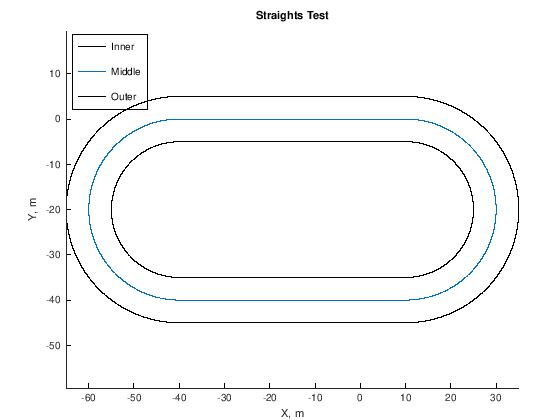

In [19]:
lengths = [10, 20, 50, 20, 50];
theta = [0, -pi, 0, -pi, 0];

width_track = 10;
track = BuildTrack(lengths,theta,width_track,int_positions);

figure()
hold on
title("Straights Test")
xlabel("X, m")
ylabel("Y, m")
plot(track.inner.X,track.inner.Y,"k")
plot(track.middle.X,track.middle.Y)
plot(track.outer.X,track.outer.Y,"k")
axis equal
hold off
legend("Inner", "Middle","Outer","Location","northwest")


### Function: Plotting Track Map
This next function will plot our track map (including middle idealized track). This function will automate plotting our test maps each time to save time for future tests.

In [20]:
function plotTrackMap(track)
    figure()
    hold on
    xlabel("X, m")
    ylabel("Y, m")
    plot(track.inner.X,track.inner.Y)
    plot(track.middle.X,track.middle.Y)
    plot(track.outer.X,track.outer.Y)
    axis equal
    hold off
    legend("Inner", "Middle","Outer","Location","northwest")
end

Unit test again. Basically we want to recreate the plot seen above.

i =  2


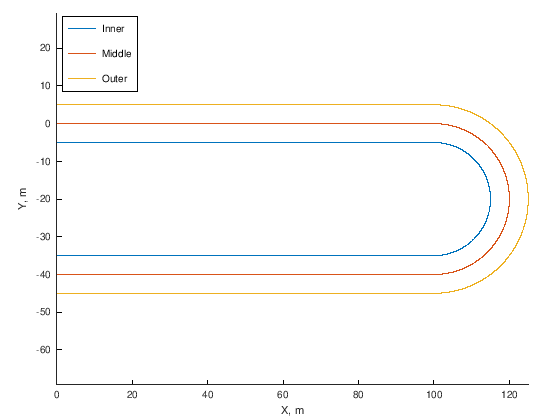

In [21]:
lengths = [100, 20,100];
theta = [0, -pi,0];
width_track = 10;
track = BuildTrack(lengths,theta,width_track,int_positions);

plotTrackMap(track)

## Constructing A Racing Line
In this next set of functions we will construct functions based off of work done by Dr. Krisada (Mick) Kritayakirana in his 2012 thesis, [Autonomous Vehicle Control at the Limts of Handling](https://dynamicdesignlab.sites.stanford.edu/sites/g/files/sbiybj9456/f/publications/2012_Thesis_Kritayakirana_Autonomous_Vehicle_Control_at_the_Limits_of_Handling.pdf). Using Dr. Kritayakirana's methodology we will will create a racing line "path" that will create a more realsitic driver model.
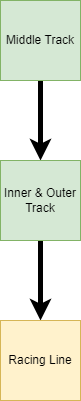
Our first step in this section is to determine points along our constant radius segement for a given turn.

### Function: Deteriming Constant Radius Points And Station Values
This function will use the inner and outer track geometetry and determine the X,Y points for:
1. Apex of the Constant Radius (CR) Segement 
2. Beginning of CR Segement
3. End of CR Segment

These three points will allow us to determine the center point of our constant radius segement as well as the radius and ultimantly necessary angle to estabilish that segment of the racing line. Additionally, this function will return three station and curvature values for our CR segemt. The CR values will ultimantly be overwritten but for now they are being returned. This function makes heavy use of identifying index numbers through logic statemtents and the find function in order to find specific data points within our track data set.

In [22]:
function [S,K,X,Y,Heading] = GetTurnPoints(track)
    % Get Inner Part of RL In A Turn
    indicies = 1:length(track.inner.S);
    K_thresh = 0;
    turn_inner_ind = indicies((abs(track.inner.K) > K_thresh)); % find indicies until the next straight
    S_apex_inner = (track.inner.S(turn_inner_ind(1))+track.inner.S(turn_inner_ind(end)))/2;
    K_apex_inner = (track.inner.K(turn_inner_ind(1))+track.inner.K(turn_inner_ind(end)))/2;
    
    % Uses some tomfoolery to determine the X & Y values of the apex of the inner turn indepdent of finding specific X & Y values of inner track
    int_position_dummy.X = track.inner.X(turn_inner_ind(1));
    int_position_dummy.Y = track.inner.Y(turn_inner_ind(1));
    int_position_dummy.nu = track.inner.heading(turn_inner_ind(1));
    S_dummy = [track.inner.S(turn_inner_ind(1)), S_apex_inner];
    K_dummy = [track.inner.K(turn_inner_ind(1)), K_apex_inner];
    [dummy] = fillTrack(S_dummy,K_dummy,int_position_dummy);
    X_inner_apex = dummy.X(end);
    Y_inner_apex = dummy.Y(end);
    Heading_inner_apex = dummy.heading(end);
    % Get Middle Points of RL In A Turn
    ind_mid = 1:length(track.middle.S);
    turn_mid_ind = indicies((abs(track.middle.K) > K_thresh));
    
    % Finds CR starting points
    S_CR_start = track.middle.S(turn_mid_ind(1));
    K_CR_start = track.middle.K(turn_mid_ind(1));
    X_CR_start = track.middle.X(turn_mid_ind(1));
    Y_CR_start = track.middle.Y(turn_mid_ind(1));
    Heading_CR_start = track.middle.heading(turn_mid_ind(1));
    % Finds CR ending points
    S_CR_end = track.middle.S(turn_mid_ind(end));
    K_CR_end = track.middle.K(turn_mid_ind(end));
    X_CR_end = track.middle.X(turn_mid_ind(end));
    Y_CR_end = track.middle.Y(turn_mid_ind(end));
    Heading_CR_end = track.middle.heading(turn_mid_ind(end));
    % Package it all together
    S = [S_CR_start,S_apex_inner,S_CR_end];
    K = [K_CR_start,K_apex_inner,K_CR_end];
    X = [X_CR_start, X_inner_apex, X_CR_end];
    Y = [Y_CR_start, Y_inner_apex,Y_CR_end];
    Heading = [Heading_CR_start,Heading_inner_apex,Heading_CR_end];
end

Unit test to ensure syntax works and that we get our correct points.

In [23]:
[S_TP,K_TP,X_TP,Y_TP,Heading_TP] = GetTurnPoints(track)

S_TP =

   100.01   123.56   162.83

K_TP =

  -0.050000  -0.066667  -0.050000

X_TP =

   100.01   115.01   100.03

Y_TP =

    0.00000  -19.98305  -39.99999

Heading_TP =

   0.00000  -1.57000  -3.14100



Plot our track and the points that will make our constant radius segment.

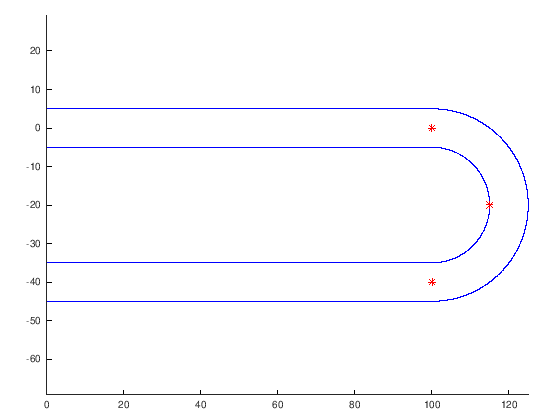

In [24]:
figure()
hold on
plot(track.inner.X,track.inner.Y,"b")
plot(track.outer.X,track.outer.Y,"b")
plot(X_TP,Y_TP,"*r")
axis equal

### Function: Determining Center of Constant Radius Segment
Using the function providide [here](https://www.mathworks.com/matlabcentral/fileexchange/5557-circle-fit), we will determine the center and radius of our constant radius segment. Additionally, the provided circlefit function will be modified to return updated curvature values for our desired CR segment.

In [25]:
function   [xc,yc,K] = circfit(x,y,K_int)
    xc = ((x(1)^2+y(1)^2)*(y(2)-y(3))+(x(2)^2+y(2)^2)*(y(3)-y(1))+(x(3)^2+y(3)^2)*(y(1)-y(2)))/(2*(x(1)*(y(2)-y(3))-y(1)*(x(2)-x(3))+x(2)*y(3)-x(3)*y(2)));
    yc = ((x(1)^2+y(1)^2)*(x(3)-x(2))+(x(2)^2+y(2)^2)*(x(1)-x(3))+(x(3)^2+y(3)^2)*(x(2)-x(1)))/(2*(x(1)*(y(2)-y(3))-y(1)*(x(2)-x(3))+x(2)*y(3)-x(3)*(y(2))));
    radius = sqrt((xc-x(1))^2+(yc^2-y(1)^2));
    if K_int>0
        K = 1/radius;
    else
        K = -1/radius;
    end
    K = [K, K, K];
    %xc = (ma*mb*(y(1)-y(3))+mb*(x(1)-x(2))-ma*(x(2)+x(3)))/(2*(mb-ma))
end

In [26]:
[xc,yc,K] = circfit(X_TP,Y_TP,K_TP)

xc =  94.179
yc = -20.003
K =

  -0.047995  -0.047995  -0.047995



Unit test, to ensure we get the correct values

In [27]:
[xc_test,yc_test,K_TP] = circfit(X_TP,Y_TP,K_TP)

xc_test =  94.179
yc_test = -20.003
K_TP =

  -0.047995  -0.047995  -0.047995



Now we will plot our turn points and the center of our constant radius segment.

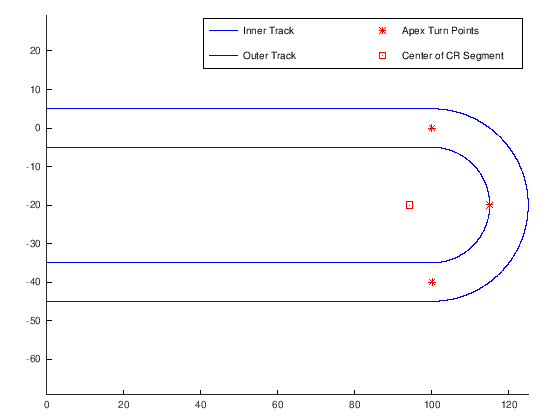

In [28]:
figure()
hold on
plot(track.inner.X,track.inner.Y,"b")
plot(track.outer.X,track.outer.Y,"b")
plot(X_TP,Y_TP,"*r")
plot(xc_test,yc_test,"rs")
axis equal
legend("Inner Track","Outer Track","Apex Turn Points","Center of CR Segment","orientation","horizontal")

### Function: Plotting CR Circle
This is a quick function that will allow us to plot the constant radius segment of our racing line to ensure that we are getting an acceptable constant radius segment when compared to a full circle drawn from our center point.

In [29]:
function [xunit, yunit] = circle(x,y,r)
    th = 0:pi/50:2*pi;
    xunit = r * cos(th) + x;
    yunit = r * sin(th) + y;
end

Unit test to create our arrays of X & Y to plot the CR segment.

In [40]:
[X_CR_circle, Y_CR_circle] = circle(xc_test,yc_test,1/K_TP(1));

Now we will initialize our constant radius segment with the initial determined from our apex turning points and points from our circle array.

In [60]:
int_positions_TP.X = xc_test(end);
int_positions_TP.Y = Y_TP(end);
int_positions_TP.nu = Heading_TP(end);

Now we will fill in our constant radius segment and build a high resolution map of our CR segment hitting our identified turn points.

In [61]:
[CR_segment] = fillBackwardsTrack(S_TP,K_TP,int_positions_TP);

Plot to ensure that we are hitting our desire points.

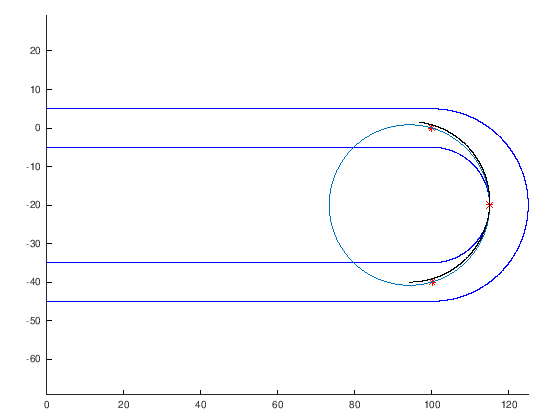

In [62]:
figure()
hold on
plot(track.inner.X,track.inner.Y,"b")
plot(track.outer.X,track.outer.Y,"b")
plot(X_TP,Y_TP,"*r")
plot(X_CR_circle, Y_CR_circle)
plot(CR_segment.X,CR_segment.Y,"k")
axis equal

### Function: Working Backwards To Connect Outer Station
Using the information detailed in Dr. Kritayakirana's thesis we know the following relationship 
$$ \Delta K = 2c^2 \Delta S $$
Where c is our constant clothoid parameter that we can specify. This function will rewrite the following equation to determine where to start transitioning out of straight following along the outer track straight. As such we get the following relationship using point slope form:
$$ |K_{CR_{Start}}-K_{Outer}| = 2c^2*|S_{CR_{Start}}-S_{Outer}| $$

$$ S_{OuterStart} = S_{CR_{START}}-\frac{|K_{OuterStart}-K_{CR_{START}}|}{2c^2} $$

In [57]:
function S_clothoid_start = ClothoidStarting(S_CR_start,K_CR_start,K_outer,c)
    S_clothoid_start = S_CR_start - abs(K_outer-K_CR_start)/(2*c^2);
end

Alternative approach using heading to calculate initial S (add deravation later if it works)

In [115]:
function S_int = ClothoidStartHeading(S_CR_start,heading_CR_start,heading_out,c)
    S_int = sqrt(abs(c^2*S_CR_start^2-(heading_out-heading_CR_start))/c^2)+0.2;
end

In [116]:
c = 0.05
S_int = ClothoidStartHeading(min(CR_segment.S),CR_segment.heading(1),0,c)
S_clothoid_start = ClothoidStarting(min(CR_segment.S),CR_segment.K(1),0,c)

c =  0.050000
S_int =  93.718
S_clothoid_start =  90.411


Now we will create a new array for our clothoid segment that will lead from the end of our CR segment to outer bounds of the track.

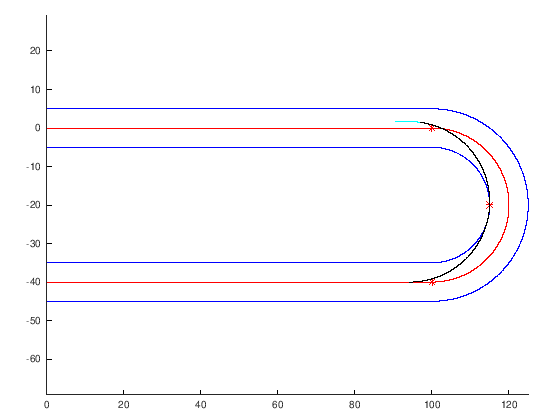

In [123]:
S_RU = [S_int,min(CR_segment.S)];
K_RU = [0,CR_segment.K(1)];
RU_int_positions.X = CR_segment.X(end);
RU_int_positions.Y =CR_segment.Y(end);
RU_int_positions.nu = CR_segment.heading(end);
RampUp = fillBackwardsTrack(S_RU,K_RU,RU_int_positions);
figure()
hold on
plot(track.inner.X,track.inner.Y,"b")
plot(track.outer.X,track.outer.Y,"b")
plot(track.middle.X,track.middle.Y,"r")
plot(X_TP,Y_TP,"*r")
plot(CR_segment.X,CR_segment.Y,"k")
plot(RampUp.X,RampUp.Y,"c")
%  xlim([85 105])
%  ylim([-10 10])
axis equal

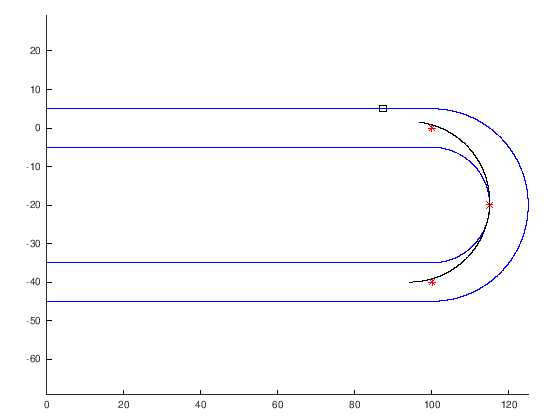

In [124]:
delta_X = (CR_segment.S(end)-S_clothoid_start)*cos(CR_segment.heading(end));
X_int = CR_segment.X(end)-delta_X;
figure()
hold on
plot(track.inner.X,track.inner.Y,"b")
plot(track.outer.X,track.outer.Y,"b")
plot(X_TP,Y_TP,"*r")
plot(CR_segment.X,CR_segment.Y,"k")
plot(X_int,width_track/2,"ks")
axis equal